In [1]:
import pickle 
import scanpy as sc
import numpy as np

In [2]:
with open("./image_feature.pickle", "rb") as f:
    data_all = pickle.load(f)

In [4]:
dict_update = {}
for i in data_all.keys():
    key_new = i.split('.')[0]
    dict_update[key_new] = data_all[i]


In [5]:
len(dict_update)

72

In [6]:
import pandas as pd

In [ ]:
df = pd.read_csv("./Patient_drug_response/Trastuzumab_2_response.csv") # please download this file from original paper

In [9]:
adata = sc.AnnData(np.array(list(dict_update.values())))

In [10]:
adata.obs_names = list(dict_update.keys())

In [11]:
df.index = df['Sample_ID']

In [12]:
df_new = df.loc[adata.obs_names]

In [14]:
res_mape = {
    1:'Yes',
    0:'No'
}

In [15]:
adata.obs['response'] = [res_mape[i] for i in df_new['Response'].values]

In [16]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

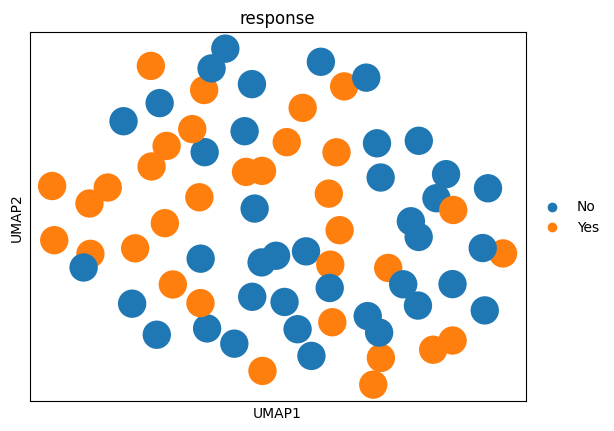

In [17]:
sc.pl.umap(adata, color='response')

In [18]:
rna_exp = pd.read_csv("./DeepPT_mRNA/Trastuzumab_2_mRNA.csv", index_col=0)

In [20]:
adata_exp = sc.AnnData(rna_exp)

In [21]:
adata_exp = adata_exp.T

In [22]:
adata_exp = adata_exp[adata.obs_names]

In [23]:
adata_exp.obs['response'] = list(adata.obs['response'])

/tmp/ipykernel_2935031/1725427589.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_exp.obs['response'] = list(adata.obs['response'])


In [24]:
adata_exp

AnnData object with n_obs × n_vars = 72 × 18450
    obs: 'response'

In [25]:
sc.pp.scale(adata_exp)
sc.tl.pca(adata_exp)
sc.pp.neighbors(adata_exp)
sc.tl.umap(adata_exp)

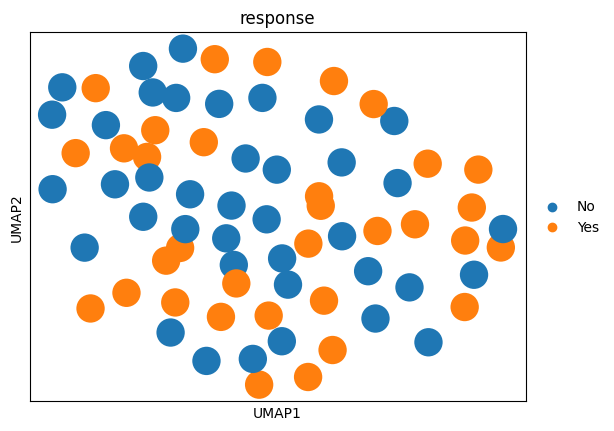

In [26]:
sc.pl.umap(adata_exp, color='response')

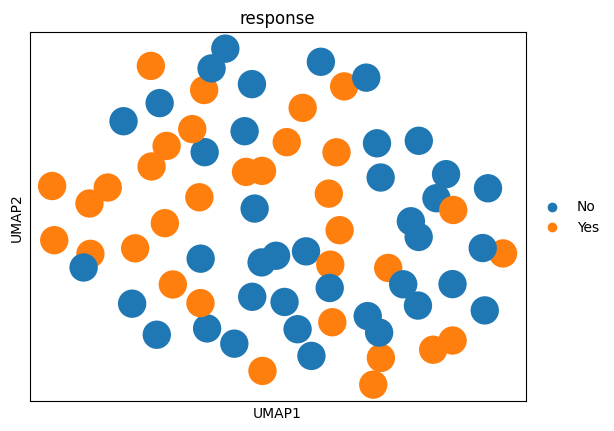

In [27]:
sc.pl.umap(adata, color='response')

In [37]:
import sklearn
import sklearn.metrics
import scib_metrics

In [38]:
from sklearn.cluster import KMeans
import numpy as np
X = adata.obsm['X_pca']
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
out = kmeans.predict(X)

In [39]:
adata.obs['leiden'] = out
adata.obs['label'] = list(adata.obs['response'])

In [31]:
nmi = []
ari = []
asw = []

nmi.append(sklearn.metrics.normalized_mutual_info_score(adata.obs.leiden, adata.obs.label))
ari.append(sklearn.metrics.adjusted_rand_score(adata.obs.leiden, adata.obs.label))
asw.append(scib_metrics.silhouette_label(adata.obsm['X_pca'], adata.obs.label))

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [32]:
print(nmi[0])
print(ari[0])
print(asw[0])

0.009403072264903948
-0.0016587769137931985
0.5015451549552381


In [40]:
import sklearn
import sklearn.metrics
import scib_metrics

In [41]:
from sklearn.cluster import KMeans
import numpy as np
X = adata_exp.obsm['X_pca']
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
out = kmeans.predict(X)

In [42]:
adata_exp.obs['leiden'] = out
adata_exp.obs['label'] = list(adata_exp.obs['response'])

In [78]:
nmi = []
ari = []
asw = []

nmi.append(sklearn.metrics.normalized_mutual_info_score(adata_exp.obs.leiden, adata_exp.obs.label))
ari.append(sklearn.metrics.adjusted_rand_score(adata_exp.obs.leiden, adata_exp.obs.label))
asw.append(scib_metrics.silhouette_label(adata_exp.obsm['X_pca'], adata_exp.obs.label))

In [79]:
print(nmi[0])
print(ari[0])
print(asw[0])

0.01656489035139345
0.015554589621836949
0.5018265056423843


In [84]:
nmi = []
ari = []
asw = []
for i in np.linspace(0,2,21)[1:]:
    sc.tl.leiden(adata, resolution = i)
    nmi.append(sklearn.metrics.normalized_mutual_info_score(adata.obs.leiden, adata.obs.label))
    ari.append(sklearn.metrics.adjusted_rand_score(adata.obs.leiden, adata.obs.label))
asw.append(scib_metrics.silhouette_label(adata.obsm['X_pca'], adata.obs.label))

In [85]:
print(max(nmi))
print(max(ari))
print(max(asw))

0.10155048846652061
0.0643225881095495
0.5015451513463631


In [86]:
nmi = []
ari = []
asw = []
for i in np.linspace(0,2,21)[1:]:
    sc.tl.leiden(adata_exp, resolution = i)
    nmi.append(sklearn.metrics.normalized_mutual_info_score(adata_exp.obs.leiden, adata_exp.obs.label))
    ari.append(sklearn.metrics.adjusted_rand_score(adata_exp.obs.leiden, adata_exp.obs.label))
asw.append(scib_metrics.silhouette_label(adata_exp.obsm['X_pca'], adata_exp.obs.label))

In [87]:
print(max(nmi))
print(max(ari))
print(max(asw))

0.07695777687541934
0.024181371306389216
0.5018265056423843


In [34]:
nmi = []
ari = []
asw = []
for i in np.linspace(0,2,21)[1:]:
    sc.tl.leiden(adata, resolution = i)
    nmi.append(sklearn.metrics.normalized_mutual_info_score(adata.obs.leiden, adata.obs.label))
    ari.append(sklearn.metrics.adjusted_rand_score(adata.obs.leiden, adata.obs.label))
asw.append(scib_metrics.silhouette_label(adata.obsm['X_pca'], adata.obs.label))

/tmp/ipykernel_2935031/3034733098.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = i)


In [35]:
print(max(nmi))
print(max(ari))
print(max(asw))

0.10155048846652061
0.0643225881095495
0.5015451549552381


In [43]:
nmi = []
ari = []
asw = []
for i in np.linspace(0,2,21)[1:]:
    sc.tl.leiden(adata_exp, resolution = i)
    nmi.append(sklearn.metrics.normalized_mutual_info_score(adata_exp.obs.leiden, adata_exp.obs.label))
    ari.append(sklearn.metrics.adjusted_rand_score(adata_exp.obs.leiden, adata_exp.obs.label))
asw.append(scib_metrics.silhouette_label(adata_exp.obsm['X_pca'], adata_exp.obs.label))

In [44]:
print(max(nmi))
print(max(ari))
print(max(asw))

0.07695777687541934
0.024181371306389216
0.5018265056423843


In [121]:
adata.obsm['X_joint'] = np.concatenate((adata.X, adata_exp.X),axis=1)

In [122]:
sc.pp.neighbors(adata, use_rep='X_joint')

In [123]:
nmi = []
ari = []
asw = []
for i in np.linspace(0,2,21)[1:]:
    sc.tl.leiden(adata_exp, resolution = i)
    nmi.append(sklearn.metrics.normalized_mutual_info_score(adata.obs.leiden, adata.obs.label))
    ari.append(sklearn.metrics.adjusted_rand_score(adata.obs.leiden, adata.obs.label))
asw.append(scib_metrics.silhouette_label(adata.obsm['X_joint'], adata.obs.label))

In [124]:
print(max(nmi))
print(max(ari))
print(max(asw))

0.009403072264903948
-0.0016587769137931985
0.5017919451929629


In [102]:
train_name,test_name = sklearn.model_selection.train_test_split(adata.obs_names, random_state=2024)

In [103]:
adata_train = adata[train_name]
adata_test = adata[test_name]

In [104]:
model = sklearn.linear_model.LogisticRegression()
model.fit(adata_train.obsm['X_pca'],adata_train.obs['label'] )

LogisticRegression()

In [105]:
y_pred = model.predict(adata_test.obsm['X_pca'])

In [106]:
print(sklearn.metrics.classification_report(adata_test.obs.label, y_pred))

              precision    recall  f1-score   support

          No       0.50      0.86      0.63         7
         Yes       0.83      0.45      0.59        11

    accuracy                           0.61        18
   macro avg       0.67      0.66      0.61        18
weighted avg       0.70      0.61      0.61        18



In [107]:
train_name,test_name = sklearn.model_selection.train_test_split(adata_exp.obs_names, random_state=2024)

In [108]:
adata_train = adata_exp[train_name]
adata_test = adata_exp[test_name]

In [109]:
model = sklearn.linear_model.LogisticRegression()
model.fit(adata_train.obsm['X_pca'],adata_train.obs['label'] )

/home/tl688/.conda/envs/evo/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
y_pred = model.predict(adata_test.obsm['X_pca'])

In [111]:
print(sklearn.metrics.classification_report(adata_test.obs.label, y_pred))

              precision    recall  f1-score   support

          No       0.45      0.71      0.56         7
         Yes       0.71      0.45      0.56        11

    accuracy                           0.56        18
   macro avg       0.58      0.58      0.56        18
weighted avg       0.61      0.56      0.56        18

